In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [61]:
train=pd.read_csv('D://Academic Operations//DSBA - Python//Online//Introduction to Python//fifa.csv')

In [62]:
train.shape#check the dimensions of the data set

(18207, 60)

In [63]:
train.head()#check the first 5 rows of the data set

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [64]:
train.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [65]:
fifa=train#renaming the data set from train to fifa

In [66]:
fifa=fifa.drop(columns=['Photo','Flag','Club Logo'],axis=1)

In [67]:
fifa.shape

(18207, 57)

In [68]:
fifa.Weight=fifa.Weight.str.split('lbs',expand=True) # correcting the weight column

In [69]:
fifa.shape

(18207, 57)

fifa.Weight.describe()

In [71]:
fifa.Weight.isnull().sum()

48

In [72]:
np.array(fifa.Weight,dtype=float)

array([159., 183., 150., ..., 148., 154., 176.])

In [73]:
fifa.Weight=list(np.float_(fifa.Weight)) # changing string to float

## Q1: What is the arithmetic mean of the variable 'weight'?

In [78]:
fifa.Weight.mean()

165.97654748173778

In [79]:
fifa.Weight.median()

165.0

In [80]:
fifa.Weight.fillna(value=fifa.Weight.median(),inplace=True)

In [81]:
value=fifa.Value.str.split("€",n=-2,expand=True)[1] # dealing with value column

In [82]:
value=value.str.replace('M','0000000') # replacing m by 0000000

In [83]:
value

0        110.50000000
1           770000000
2        118.50000000
3           720000000
4          1020000000
5           930000000
6           670000000
7           800000000
8           510000000
9           680000000
10          770000000
11        76.50000000
12          440000000
13          600000000
14          630000000
15          890000000
16        83.50000000
17          780000000
18          580000000
19        53.50000000
20        51.50000000
21          600000000
22          380000000
23        64.50000000
24          270000000
25          810000000
26        69.50000000
27        59.50000000
28        69.50000000
29          620000000
             ...     
18177             70K
18178             50K
18179             50K
18180             40K
18181             50K
18182             50K
18183               0
18184             40K
18185             50K
18186             60K
18187             40K
18188             60K
18189             60K
18190             60K
18191     

In [84]:
value=value.str.replace('K','000') # replacing the value of k by 000

In [85]:
value=value.str.replace('.50000000','5000000') # correcting the values

In [86]:
value

0        1105000000
1         770000000
2        1185000000
3         720000000
4        1020000000
5         930000000
6         670000000
7         800000000
8         510000000
9         680000000
10        770000000
11        765000000
12        440000000
13        600000000
14        630000000
15        890000000
16        835000000
17        780000000
18        580000000
19        535000000
20        515000000
21        600000000
22        380000000
23        645000000
24        270000000
25        810000000
26        695000000
27        595000000
28        695000000
29        620000000
            ...    
18177         70000
18178         50000
18179         50000
18180         40000
18181         50000
18182         50000
18183             0
18184         40000
18185         50000
18186         60000
18187         40000
18188         60000
18189         60000
18190         60000
18191         50000
18192         50000
18193         50000
18194         50000
18195         60000


In [87]:
v=list(np.float_(value)) # converting to float

In [88]:
v ## converted values to the float

[1105000000.0,
 770000000.0,
 1185000000.0,
 720000000.0,
 1020000000.0,
 930000000.0,
 670000000.0,
 800000000.0,
 510000000.0,
 680000000.0,
 770000000.0,
 765000000.0,
 440000000.0,
 600000000.0,
 630000000.0,
 890000000.0,
 835000000.0,
 780000000.0,
 580000000.0,
 535000000.0,
 515000000.0,
 600000000.0,
 380000000.0,
 645000000.0,
 270000000.0,
 810000000.0,
 695000000.0,
 595000000.0,
 695000000.0,
 620000000.0,
 735000000.0,
 735000000.0,
 695000000.0,
 590000000.0,
 460000000.0,
 430000000.0,
 600000000.0,
 360000000.0,
 570000000.0,
 240000000.0,
 300000000.0,
 40000000.0,
 570000000.0,
 645000000.0,
 510000000.0,
 640000000.0,
 305000000.0,
 625000000.0,
 520000000.0,
 380000000.0,
 5000000.0,
 340000000.0,
 465000000.0,
 465000000.0,
 340000000.0,
 610000000.0,
 595000000.0,
 415000000.0,
 520000000.0,
 445000000.0,
 565000000.0,
 530000000.0,
 500000000.0,
 5000000.0,
 365000000.0,
 465000000.0,
 5000000.0,
 455000000.0,
 435000000.0,
 5000000.0,
 300000000.0,
 390000000.0

## Q2) What is the arithmetic mean of the variable ‘Value’ (in Euros)?

In [97]:
fifa.Value.mean()

16775484.607502334

In [98]:
fifa.Value=v

In [99]:
fifa.Value

0        1.105000e+09
1        7.700000e+08
2        1.185000e+09
3        7.200000e+08
4        1.020000e+09
5        9.300000e+08
6        6.700000e+08
7        8.000000e+08
8        5.100000e+08
9        6.800000e+08
10       7.700000e+08
11       7.650000e+08
12       4.400000e+08
13       6.000000e+08
14       6.300000e+08
15       8.900000e+08
16       8.350000e+08
17       7.800000e+08
18       5.800000e+08
19       5.350000e+08
20       5.150000e+08
21       6.000000e+08
22       3.800000e+08
23       6.450000e+08
24       2.700000e+08
25       8.100000e+08
26       6.950000e+08
27       5.950000e+08
28       6.950000e+08
29       6.200000e+08
             ...     
18177    7.000000e+04
18178    5.000000e+04
18179    5.000000e+04
18180    4.000000e+04
18181    5.000000e+04
18182    5.000000e+04
18183    0.000000e+00
18184    4.000000e+04
18185    5.000000e+04
18186    6.000000e+04
18187    4.000000e+04
18188    6.000000e+04
18189    6.000000e+04
18190    6.000000e+04
18191    5

In [100]:
# deaaling with the wage column
wage=fifa.Wage.str.split("€",n=-2,expand=True)[1]
wage=wage.str.replace('K','000') # replacing the value of k by 0
wage=list(np.float_(wage))

In [101]:
fifa.Wage=wage

In [102]:
fifa.Wage.head()


0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [103]:
fifa.Joined.head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [104]:
joined=fifa.Joined.str.split(', ',expand=True)[1] # getting rid of joined column

In [105]:
joined.describe()

count     16654
unique       22
top        2018
freq       6569
Name: 1, dtype: object

In [106]:
joined

0        2004
1        2018
2        2017
3        2011
4        2015
5        2012
6        2012
7        2014
8        2005
9        2014
10       2014
11       2014
12       2010
13       2010
14       2016
15       2015
16       2010
17       2014
18       2014
19       2018
20       2008
21       2013
22       2011
23       2011
24       2005
25       2018
26       2017
27       2013
28        NaN
29       2010
         ... 
18177    2016
18178    2018
18179    2018
18180    2013
18181    2017
18182    2018
18183    2018
18184    2017
18185    2018
18186    2016
18187    2017
18188    2017
18189    2017
18190    2018
18191    2018
18192    2018
18193    2018
18194    2018
18195    2018
18196    2017
18197    2018
18198    2018
18199    2018
18200    2015
18201    2018
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: 1, Length: 18207, dtype: object

In [107]:
joined.isnull().sum()
joined.fillna(value='2018',inplace=True)

In [108]:
fifa.Joined=list(np.int_(joined))

In [109]:
rc=fifa['Release Clause'].str.split('€',expand=True)[1]

In [110]:
fifa['Release Clause'] # relase clause

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
5        €172.1M
6        €137.4M
7          €164M
8        €104.6M
9        €144.5M
10       €127.1M
11       €156.8M
12        €90.2M
13         €111M
14       €121.3M
15       €153.5M
16       €160.7M
17       €165.8M
18       €123.3M
19       €113.7M
20       €105.6M
21         €111M
22        €62.7M
23       €119.3M
24        €44.6M
25       €166.1M
26       €137.3M
27       €126.4M
28           NaN
29       €105.4M
          ...   
18177      €193K
18178       €94K
18179      €119K
18180       €78K
18181      €109K
18182      €101K
18183        NaN
18184       €78K
18185       €88K
18186      €167K
18187       €66K
18188      €143K
18189      €125K
18190      €165K
18191      €119K
18192      €119K
18193       €99K
18194      €109K
18195      €153K
18196      €113K
18197       €88K
18198      €165K
18199      €175K
18200      €143K
18201      €153K
18202      €143K
18203      €113K
18204      €16

In [111]:
rc=rc.str.replace('M','0000000') # rc= release clause
rc=rc.str.replace('K','000')


In [112]:
rc.head()

0    226.50000000
1    127.10000000
2    228.10000000
3    138.60000000
4    196.40000000
Name: 1, dtype: object

In [113]:
rc=rc.str.replace('.50000000','5000000')
rc=rc.str.replace('.40000000','4000000')
rc=rc.str.replace('.30000000','3000000')
rc=rc.str.replace('.20000000','2000000')
rc=rc.str.replace('.10000000','1000000')
rc=rc.str.replace('.90000000','9000000')
rc=rc.str.replace('.80000000','8000000')
rc=rc.str.replace('.70000000','7000000')
rc=rc.str.replace('.60000000','6000000')

In [117]:
rc.head()

0    2265000000
1    1271000000
2    2281000000
3    1386000000
4    1964000000
Name: 1, dtype: object

In [118]:
fifa['Release Clause']=rc

In [125]:
fifa['Release Clause']=fifa['Release Clause'].fillna(value=fifa['Release Clause'].median())

In [126]:
vu=fifa['Contract Valid Until'] # dealing with valid until 

In [127]:
vu.head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [128]:
vu=vu.fillna(value='2019')

## Q3: What are total number of observations in the 'Contract Valid Until' column after imputing the missing values with '2019'?

In [130]:
vu.describe()

count     18207
unique       36
top        2019
freq       5108
Name: Contract Valid Until, dtype: object

In [131]:
vu.isnull().sum()

0

In [132]:
vu=vu.replace(to_replace='Jun 30, 2019',value='2019')

In [133]:
vu.unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '2025', '2026',
       'Dec 31, 2018', '2018', 'May 31, 2020', 'Jun 30, 2020',
       'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019', 'Jun 1, 2019',
       'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019', 'Jan 2, 2019',
       'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019', 'May 4, 2019',
       'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019', 'Dec 1, 2019',
       'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019', 'Jan 15, 2019',
       'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'], dtype=object)

In [134]:
vu=vu.replace(to_replace=['Dec 31, 2018','May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019', 'Jun 1, 2019',
       'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019', 'Jan 2, 2019',
       'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019', 'May 4, 2019',
       'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019', 'Dec 1, 2019',
       'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019', 'Jan 15, 2019',
       'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],value='2019')

In [135]:
vu=vu.replace(to_replace=['May 31, 2020', 'Jun 30, 2020'],value='2020')

## Q4: How many unique years are present in the 'Contract Valid Until' variable?

In [136]:
vu.unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '2025', '2026',
       '2018'], dtype=object)

In [138]:
vu=list(np.int_(vu))

In [139]:
fifa['Contract Valid Until']=vu

In [140]:
fifa.Height=list(np.float_(fifa.Height.str.replace("'" , ".")))

In [141]:
fifa.Height.fillna(value=fifa.Height.median(),inplace=True)

In [142]:
fifa.Height.isnull().sum()

0

In [143]:
fifa['Contract Valid Until']=train['Contract Valid Until']

In [144]:
fifa['Contract Valid Until'].isnull().sum()

289

In [145]:
fifa['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [146]:
fifa['Contract Valid Until']=pd.to_datetime(train['Contract Valid Until']).dt.year

## Q5: What is the floor of the arithmetic mean  of the column 'Contract Valid Until'?

In [147]:
fifa['Contract Valid Until'].describe()

count    17918.000000
mean      2020.146668
std          1.294468
min       2018.000000
25%       2019.000000
50%       2020.000000
75%       2021.000000
max       2026.000000
Name: Contract Valid Until, dtype: float64

In [150]:
fifa['Contract Valid Until'].mode()

0    2019.0
dtype: float64

In [151]:
fifa['International Reputation'].fillna(value=1.000000,inplace=True)

## Q6: What is the standard deviation of the variable ‘International Reputation’ after imputing the missing values with 1?

In [157]:
fifa['International Reputation'].describe()

count    18207.000000
mean         1.112924
std          0.393554
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

In [158]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation        0
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                          0
Loaned From                 16943
Contract Valid Until            0
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [159]:
fifa['Weight'].describe()

count    18207.000000
mean       165.976547
std         15.572856
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

In [160]:
# plot for overall

In [161]:
#sns.set_palette("BrBG")
#sns.set_style('whitegrid')

Text(0.5, 1.0, 'ShortPassing')

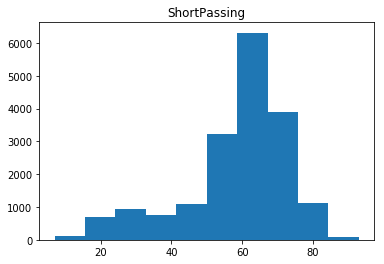

In [165]:
plt.hist(fifa.ShortPassing)
plt.title("ShortPassing")

Text(0.5, 1.0, 'Volleys')

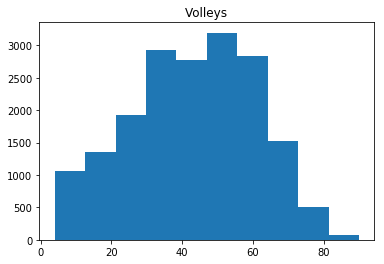

In [166]:
plt.hist(fifa.Volleys)
plt.title("Volleys")

Text(0.5, 1.0, 'Dribbling')

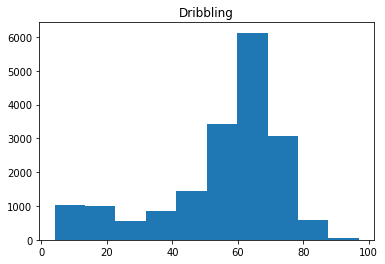

In [167]:
plt.hist(fifa.Dribbling)
plt.title("Dribbling")

## Q7: Which of the following is the histogram of the variable ‘Overall’ of all the players?

Text(0.5, 1.0, 'Plot for overall ratings')

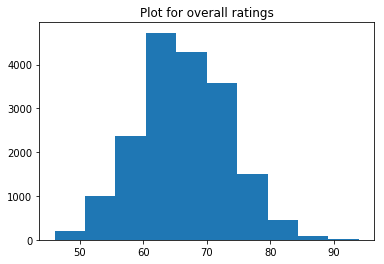

In [162]:
plt.hist(fifa.Overall)
plt.title("Plot for overall ratings")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


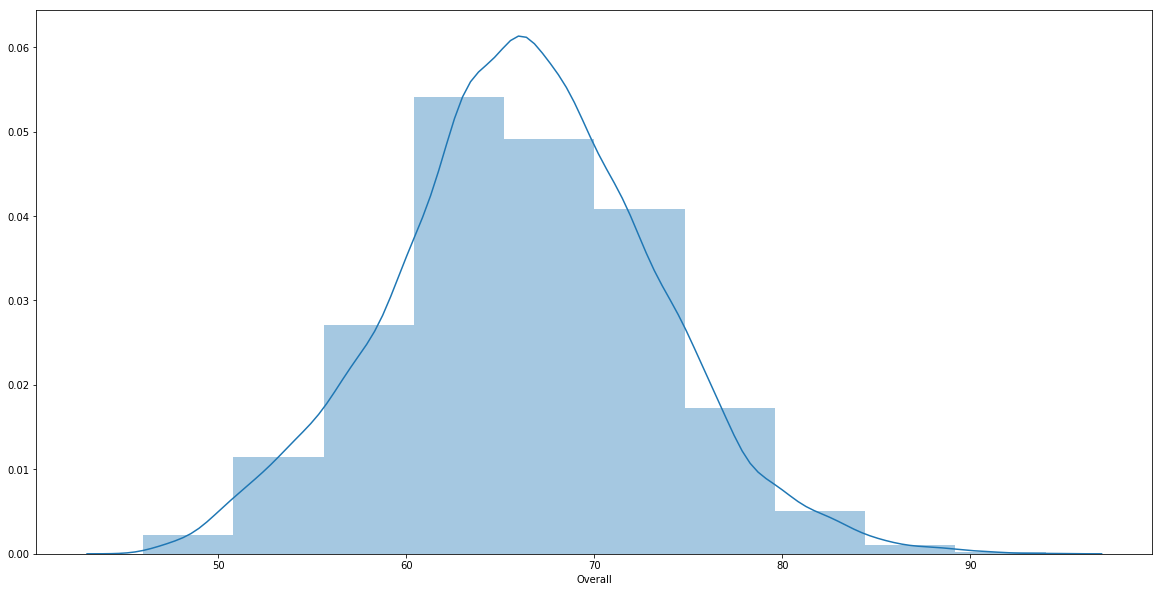

In [168]:
plt.figure(figsize=(20,10))
sns.distplot(fifa.Overall,bins=10)

## Q8: Which of the following is the scatter plot between ‘Overall’ and ‘Height’?

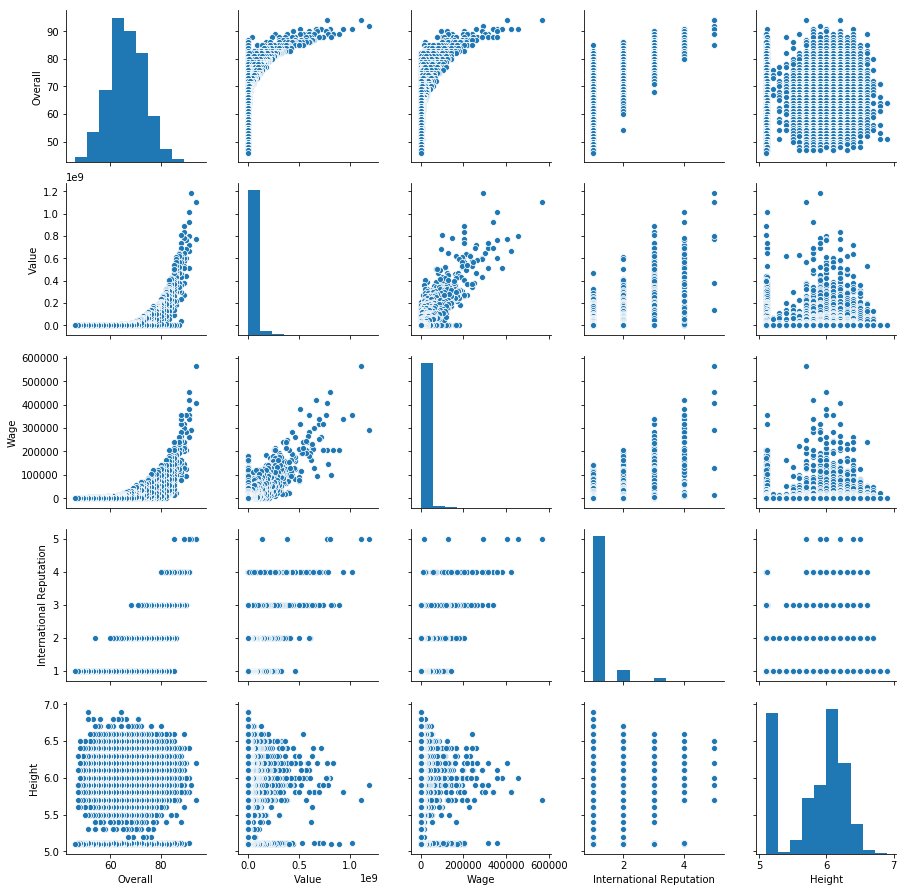

In [169]:
cols= ['Overall', 'Value','Wage','International Reputation','Height']
sns.pairplot(fifa[cols])

## Q9: Create a dataframe which is sorted by the 'Overall' variable in the descending order and which only has players whose contract is valid till 2020. What is the name of the 8th player in that particular dataframe?

In [171]:
target=fifa[fifa['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20)
target

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,720000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1386000000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,670000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1374000000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,510000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1046000000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,930000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1721000000
13,168542,David Silva,32,Spain,90,90,Manchester City,600000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,11000000
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,600000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,11000000
24,138956,G. Chiellini,33,Italy,89,89,Juventus,270000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,446000000
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,735000000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1415000000
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,240000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,444000000
50,175943,D. Mertens,31,Belgium,87,87,Napoli,5000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,765000000


## Q10: What is the average age of the players whose contract is till 2020?

In [174]:
fifa[fifa['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20).Age.mean()

30.65

In [175]:
fifa[fifa['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20).Wage.mean()

205450.0

In [176]:
np.corrcoef(target.Overall,target.Value) # highly corelated

array([[1.       , 0.7572597],
       [0.7572597, 1.       ]])

In [177]:
newtrain=pd.DataFrame(data=fifa,columns=['Name','Position','Wage','Overall'])

In [178]:
newtrain.head()

,Name,Position,Wage,Overall
0,L. Messi,RF,565000.0,94
1,Cristiano Ronaldo,ST,405000.0,94
2,Neymar Jr,LW,290000.0,92
3,De Gea,GK,260000.0,91
4,K. De Bruyne,RCM,355000.0,91


In [179]:
newtrain.Position.describe()

count     18147
unique       27
top          ST
freq       2152
Name: Position, dtype: object

In [180]:
newtrain.fillna(value='ST',inplace=True)

In [181]:
newtrain.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [183]:
newtrain[newtrain.Position=='ST'].sort_values('Overall',ascending=False).head()

,Name,Position,Wage,Overall
1,Cristiano Ronaldo,ST,405000.0,94
10,R. Lewandowski,ST,205000.0,90
16,H. Kane,ST,205000.0,89
23,S. Agüero,ST,300000.0,89
36,G. Bale,ST,355000.0,88


In [184]:
position=newtrain.groupby(by='Position')

In [185]:
position.get_group('ST').head().Name[1]

'Cristiano Ronaldo'

In [186]:
#a) Are there any players appearing in more than one Table. Please point out such players.
for i in ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']:
    print('\n',i, position.get_group(i).head())


 RF              Name Position      Wage  Overall
0        L. Messi       RF  565000.0       94
50     D. Mertens       RF  135000.0       87
528     D. Valeri       RF   12000.0       80
890   L. Podolski       RF   11000.0       78
1774     C. Ciano       RF   17000.0       75

 ST                  Name Position      Wage  Overall
1   Cristiano Ronaldo       ST  405000.0       94
10     R. Lewandowski       ST  205000.0       90
16            H. Kane       ST  205000.0       89
23          S. Agüero       ST  300000.0       89
36            G. Bale       ST  355000.0       88

 LW           Name Position      Wage  Overall
2    Neymar Jr       LW  290000.0       92
29  L. Insigne       LW  165000.0       88
30        Isco       LW  315000.0       88
32    Coutinho       LW  340000.0       88
55     L. Sané       LW  195000.0       86

 GK              Name Position      Wage  Overall
3          De Gea       GK  260000.0       91
9        J. Oblak       GK   94000.0       90
18  M. t

In [187]:
newtrain.sort_values('Overall',ascending=False).head()

,Name,Position,Wage,Overall
0,L. Messi,RF,565000.0,94
1,Cristiano Ronaldo,ST,405000.0,94
2,Neymar Jr,LW,290000.0,92
3,De Gea,GK,260000.0,91
4,K. De Bruyne,RCM,355000.0,91


In [408]:
for i in ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'] :
    print('\n',i,newtrain[newtrain.Position==i].sort_values('Overall',ascending=False).Wage.head(n=5).mean())


 RF 148000.0

 ST 294000.0

 LW 261000.0

 GK 192800.0

 RCM 240800.0

 LF 121200.0

 RS 132200.0

 RCB 231000.0

 LCM 184400.0

 CB 139600.0

 LDM 126600.0

 CAM 174000.0

 CDM 217000.0

 LS 130200.0

 LCB 162000.0

 RM 131400.0

 LAM 81600.0

 LM 164600.0

 LB 177200.0

 RDM 105000.0

 RW 202000.0

 CM 130600.0

 RB 155400.0

 RAM 45400.0

 CF 47400.0

 RWB 44200.0

 LWB 34200.0


In [188]:
newtrain.head()

,Name,Position,Wage,Overall
0,L. Messi,RF,565000.0,94
1,Cristiano Ronaldo,ST,405000.0,94
2,Neymar Jr,LW,290000.0,92
3,De Gea,GK,260000.0,91
4,K. De Bruyne,RCM,355000.0,91


In [189]:
vv['Position']=newtrain[newtrain['Position']=='RF'].Name

NameError: name 'vv' is not defined

In [78]:
newtrain.Overall

0        94
1        94
2        92
3        91
4        91
5        91
6        91
7        91
8        91
9        90
10       90
11       90
12       90
13       90
14       89
15       89
16       89
17       89
18       89
19       89
20       89
21       89
22       89
23       89
24       89
25       88
26       88
27       88
28       88
29       88
         ..
18177    48
18178    48
18179    48
18180    48
18181    48
18182    48
18183    48
18184    48
18185    48
18186    47
18187    47
18188    47
18189    47
18190    47
18191    47
18192    47
18193    47
18194    47
18195    47
18196    47
18197    47
18198    47
18199    47
18200    47
18201    47
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

In [190]:
arc=pd.DataFrame(data=newtrain[newtrain.Position=="RF"].Name)

In [191]:
newtrain[newtrain.Position=="LF"].sort_values('Overall',ascending=False).Name

5             E. Hazard
15            P. Dybala
76              Iniesta
272      Jonathan Viera
1379          S. Blanco
1449        J. Campbell
2608          S. Araujo
4592           P. Ebert
5191     Gabriel Xavier
5855      A. Trajkovski
7772           F. Amuzu
9066     O. Kiteishvili
9346          H. Ojamaa
11996            T. Abe
13178       T. Matsuura
Name: Name, dtype: object